# Software Regional Request Summary

Analysis of software development request patterns across regions and complexity levels to inform enterprise growth strategy.

In [1]:
# Install and import required packages
import subprocess
import sys

packages = ['pandas', 'numpy', 'matplotlib', 'seaborn']

for package in packages:
    try:
        __import__(package)
        print(f"✓ {package} already installed")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

print("Package installation complete!")

# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load the clean software regional requests dataset
df = pd.read_csv('softwareregionalrequests_clean.csv')

# Display basic dataset info
print(f"\nDataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())

✓ pandas already installed
✓ numpy already installed
✓ matplotlib already installed
✓ seaborn already installed
Package installation complete!

Dataset shape: (1942, 9)
Columns: ['region', 'facet', 'level', 'variable', 'cluster_name', 'value', 'calculation_method', 'contributing_countries', 'regional_weight']

First few rows:
  region    facet  level       variable  \
0   APAC  request      0  request_count   
1   APAC  request      0  request_count   
2   APAC  request      0  request_count   
3   APAC  request      0  request_count   
4   APAC  request      0  request_count   

                                        cluster_name   value  \
0  Debug and fix errors in existing React applica...  1673.0   
1  Help with PDF file processing, coding, and doc...  1161.0   
2       Debug and fix errors in existing Python code  1049.0   
3  Debug and fix software bugs in existing applic...   993.0   
4  Fix styling and layout issues in React components   928.0   

  calculation_method        

In [2]:
# Dataset Summary
print("Available regions in the dataset:")
print(df['region'].unique())
print(f"\nTotal unique regions: {df['region'].nunique()}")

# Check record counts by region
print("\nRecord counts by region:")
region_counts = df['region'].value_counts()
print(region_counts)

Available regions in the dataset:
['APAC' 'Europe' 'Latin America' 'Middle East & Africa' 'North America'
 'Unknown']

Total unique regions: 6

Record counts by region:
region
APAC                    406
North America           406
Europe                  402
Latin America           374
Middle East & Africa    350
Unknown                   4
Name: count, dtype: int64


# North America Analysis

In [3]:
# Filter data for North America
na_df = df[df['region'] == 'North America'].copy()

print(f"North America records: {len(na_df)}")
print(f"Complexity levels: {sorted(na_df['level'].unique())}")
print(f"Variables: {na_df['variable'].unique()}")

# Show distribution by level and variable
print("\nRecords by level and variable:")
for level in sorted(na_df['level'].unique()):
    level_data = na_df[na_df['level'] == level]
    print(f"\nLevel {level}:")
    for var in level_data['variable'].unique():
        count = len(level_data[level_data['variable'] == var])
        print(f"  {var}: {count} records")

North America records: 406
Complexity levels: [np.int64(0), np.int64(1), np.int64(2)]
Variables: ['request_count' 'request_pct']

Records by level and variable:

Level 0:
  request_count: 167 records
  request_pct: 167 records

Level 1:
  request_count: 28 records
  request_pct: 28 records

Level 2:
  request_count: 8 records
  request_pct: 8 records


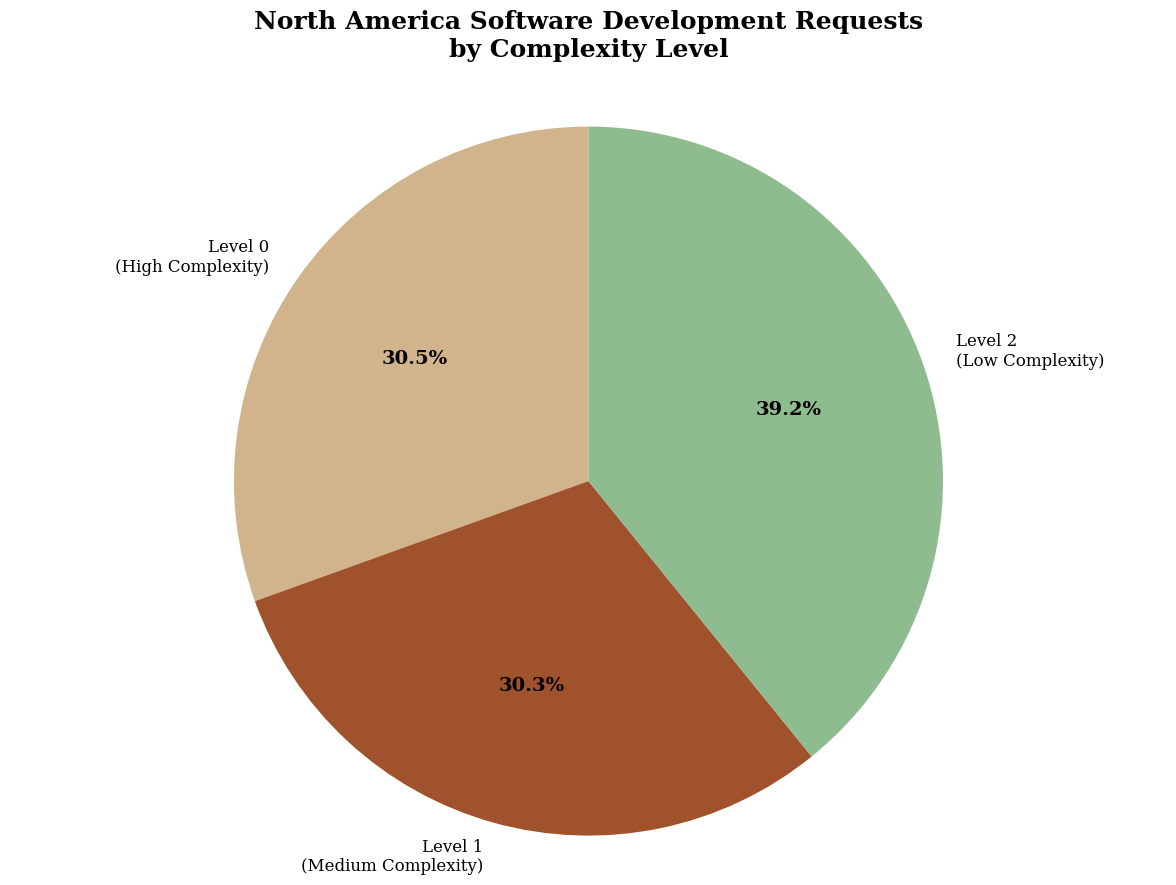


📊 NORTH AMERICA SOFTWARE DEVELOPMENT SUMMARY
Total Requests: 162,082

🔴 Level 0 High Complexity: 49,435 requests (30.5%)
🟡 Level 1 Medium Complexity: 49,174 requests (30.3%)
🟢 Level 2 Low Complexity: 63,473 requests (39.2%)



In [4]:
# North America Visual Pie Chart - Level Distribution
# Set custom font and style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

# Calculate level distribution for North America
na_level_counts = {}
for level in sorted(na_df['level'].unique()):
    level_data = na_df[(na_df['level'] == level) & (na_df['variable'] == 'request_count')]
    total = level_data['value'].astype(float).sum()
    na_level_counts[f'Level {level}'] = total

# Prepare data for pie chart
labels = []
sizes = []
earth_colors = ['#D2B48C', '#A0522D', '#8FBC8F']  # Tan, Sienna, Dark Sea Green

for i, (level, count) in enumerate(na_level_counts.items()):
    complexity = "High" if "0" in level else "Medium" if "1" in level else "Low"
    labels.append(f'{level}\n({complexity} Complexity)')
    sizes.append(count)

# Create the pie chart
plt.figure(figsize=(12, 9))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=earth_colors, autopct='%1.1f%%', 
                                  startangle=90, textprops={'fontsize': 13, 'fontweight': 'normal'})

# Customize the chart
plt.title('North America Software Development Requests\nby Complexity Level', 
          fontsize=18, fontweight='bold', pad=25, family='serif')

# Style the percentage text
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(14)
    autotext.set_family('serif')

# Style the labels
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('normal')
    text.set_family('serif')

plt.axis('equal')
plt.tight_layout()
plt.show()

# Print summary statistics
total_requests = sum(sizes)
print(f"\n{'='*50}")
print(f"📊 NORTH AMERICA SOFTWARE DEVELOPMENT SUMMARY")
print(f"{'='*50}")
print(f"Total Requests: {total_requests:,.0f}\n")

for i, (label, size) in enumerate(zip(labels, sizes)):
    percentage = (size / total_requests) * 100
    level_name = label.split('\n')[0]
    complexity = label.split('\n')[1].replace('(', '').replace(')', '')
    
    if "High" in complexity:
        icon = "🔴"
    elif "Medium" in complexity:
        icon = "🟡"
    else:
        icon = "🟢"
    
    print(f"{icon} {level_name} {complexity}: {size:,.0f} requests ({percentage:.1f}%)")

print(f"\n{'='*50}")

In [5]:
# North America Software Development Requests by Complexity Level
na_level_counts = {}

for level in sorted(na_df['level'].unique()):
    level_data = na_df[(na_df['level'] == level) & (na_df['variable'] == 'request_count')]
    total = level_data['value'].astype(float).sum()
    na_level_counts[f'Level {level}'] = total

# Calculate percentages
total_requests = sum(na_level_counts.values())
na_level_percentages = {level: (count/total_requests)*100 for level, count in na_level_counts.items()}

# Create simple text-based visualization
print("North America Software Development Requests by Complexity Level")
print("=" * 60)
print(f"Total Requests: {total_requests:,.0f}\n")

for level, percentage in na_level_percentages.items():
    count = na_level_counts[level]
    bar_length = int(percentage / 2)
    bar = "█" * bar_length
    
    complexity = "High" if "0" in level else "Medium" if "1" in level else "Low"
    print(f"{level} ({complexity} Complexity):")
    print(f"  {count:,.0f} requests ({percentage:.1f}%)")
    print(f"  {bar} {percentage:.1f}%\n")

# Show the distribution
print("Summary:")
for level, percentage in na_level_percentages.items():
    print(f"  • {level}: {percentage:.1f}% of all North America software requests")

North America Software Development Requests by Complexity Level
Total Requests: 162,082

Level 0 (High Complexity):
  49,435 requests (30.5%)
  ███████████████ 30.5%

Level 1 (Medium Complexity):
  49,174 requests (30.3%)
  ███████████████ 30.3%

Level 2 (Low Complexity):
  63,473 requests (39.2%)
  ███████████████████ 39.2%

Summary:
  • Level 0: 30.5% of all North America software requests
  • Level 1: 30.3% of all North America software requests
  • Level 2: 39.2% of all North America software requests


In [6]:
# Top 5 Software Request Types in North America by Complexity Level
print("Top 5 Software Request Types in North America by Complexity Level")
print("=" * 80)

# Get top 5 for each level
top_requests = {}
for level in [0, 1, 2]:
    level_data = na_df[(na_df['level'] == level) & (na_df['variable'] == 'request_count')]
    if len(level_data) > 0:
        top_5 = level_data.nlargest(5, 'value')['cluster_name'].tolist()
        top_requests[str(level)] = top_5
    else:
        top_requests[str(level)] = []

# Create table header
print(f"{'Rank':<4} {'Level 0 (High Complexity)':<45} {'Level 1 (Medium Complexity)':<45} {'Level 2 (Low Complexity)':<45}")
print("-" * 145)

# Print rows
for i in range(5):
    rank = i + 1
    
    # Level 0
    if i < len(top_requests['0']):
        l0_name = top_requests['0'][i][:42] + "..." if len(top_requests['0'][i]) > 45 else top_requests['0'][i]
    else:
        l0_name = "-"
    
    # Level 1
    if i < len(top_requests['1']):
        l1_name = top_requests['1'][i][:42] + "..." if len(top_requests['1'][i]) > 45 else top_requests['1'][i]
    else:
        l1_name = "-"
    
    # Level 2
    if i < len(top_requests['2']):
        l2_name = top_requests['2'][i][:42] + "..." if len(top_requests['2'][i]) > 45 else top_requests['2'][i]
    else:
        l2_name = "-"
    
    print(f"{rank:<4} {l0_name:<45} {l1_name:<45} {l2_name:<45}")

print("\nKey Insights:")
print("• Level 0 (High): Most complex software development tasks")
print("• Level 1 (Medium): Moderate complexity programming requests") 
print("• Level 2 (Low): Simpler coding tasks and basic development needs")

Top 5 Software Request Types in North America by Complexity Level
Rank Level 0 (High Complexity)                     Level 1 (Medium Complexity)                   Level 2 (Low Complexity)                     
-------------------------------------------------------------------------------------------------------------------------------------------------
1    Debug and fix errors in existing Python code  Debug and fix software code errors across ... Provide comprehensive software development...
2    Help debug, optimize, and implement machin... Provide comprehensive multi-technology pro... Help develop and debug complete web applic...
3    Help troubleshoot git operations and GitHu... Provide technical troubleshooting and supp... Help with automation scripts, robotics pro...
4    Explain neural network architectures and i... Provide comprehensive database development... Help create visual content, graphics, and ...
5    Fix and improve video game development cod... Help develop, debug, a

In [7]:
# North America Software Development Request Analysis
print("North America Software Development Request Analysis")
print("=" * 50)

for level in sorted(na_df['level'].unique()):
    level_data = na_df[(na_df['level'] == level) & (na_df['variable'] == 'request_count')]
    
    num_clusters = len(level_data)
    total_volume = level_data['value'].astype(float).sum()
    avg_volume = total_volume / num_clusters if num_clusters > 0 else 0
    
    print(f"\nLevel {level} (Complexity: {'High' if level == 0 else 'Medium' if level == 1 else 'Low'}):")
    print(f"  • Distinct request types: {num_clusters}")
    print(f"  • Total volume: {total_volume:,.0f} requests")
    print(f"  • Average per request type: {avg_volume:,.0f} requests")
    
    top_requests = level_data.nlargest(5, 'value')[['cluster_name', 'value']]
    print(f"  • Top 5 request types:")
    for idx, row in top_requests.iterrows():
        print(f"    - {row['cluster_name'][:60]}{'...' if len(row['cluster_name']) > 60 else ''}: {row['value']:,.0f}")

# Calculate overall distribution percentages for insights
level_totals = []
for level in sorted(na_df['level'].unique()):
    level_data = na_df[(na_df['level'] == level) & (na_df['variable'] == 'request_count')]
    total_volume = level_data['value'].astype(float).sum()
    level_totals.append(total_volume)

grand_total = sum(level_totals)
level_percentages = [(total/grand_total)*100 for total in level_totals]

print(f"\nKey Insights:")
if len(level_percentages) >= 3:
    print(f"• Level 2 (Low complexity) accounts for {level_percentages[2]:.1f}% of total volume")
    print(f"• This suggests many users making simpler software development requests")
    print(f"• Enterprise opportunity may be in moving users toward more complex tasks")

North America Software Development Request Analysis

Level 0 (Complexity: High):
  • Distinct request types: 167
  • Total volume: 49,435 requests
  • Average per request type: 296 requests
  • Top 5 request types:
    - Debug and fix errors in existing Python code: 908
    - Help debug, optimize, and implement machine learning models ...: 671
    - Help troubleshoot git operations and GitHub repository manag...: 612
    - Explain neural network architectures and implement deep lear...: 587
    - Fix and improve video game development code and features: 579

Level 1 (Complexity: Medium):
  • Distinct request types: 28
  • Total volume: 49,174 requests
  • Average per request type: 1,756 requests
  • Top 5 request types:
    - Debug and fix software code errors across multiple programmi...: 7,931
    - Provide comprehensive multi-technology programming developme...: 6,055
    - Provide technical troubleshooting and support for software, ...: 3,709
    - Provide comprehensive database de

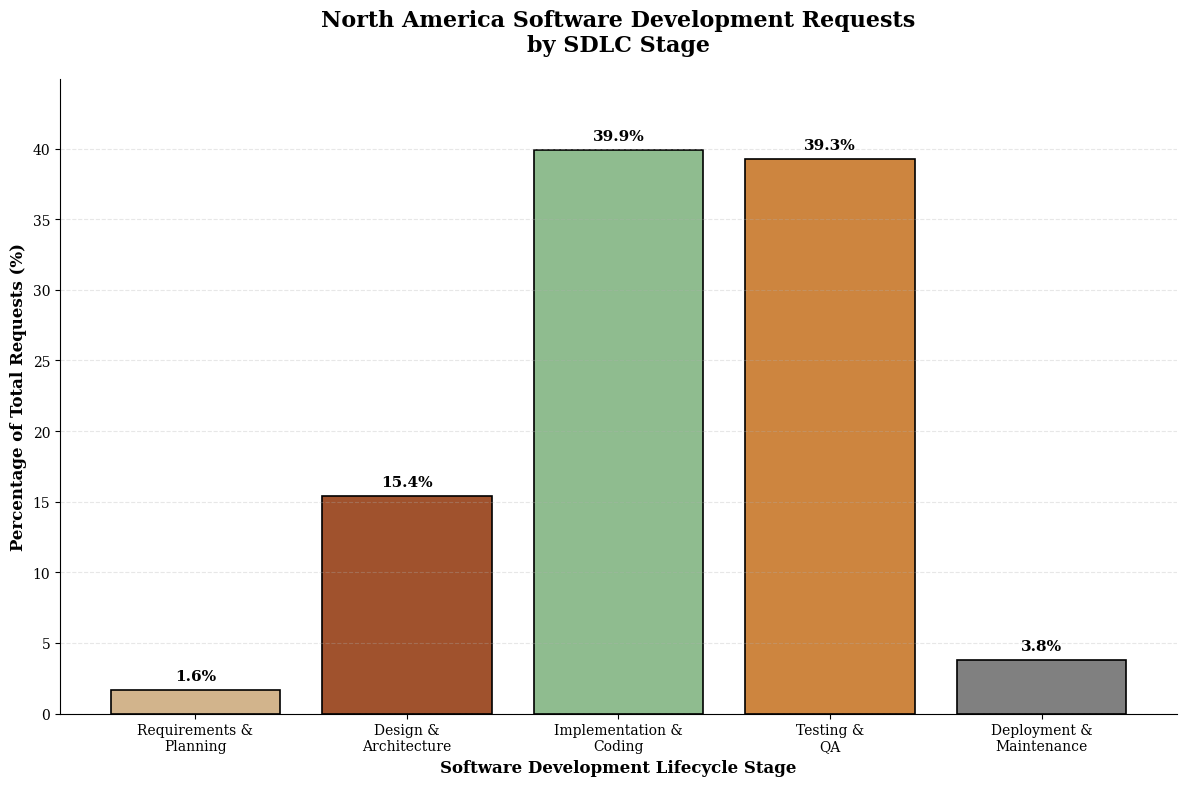


📊 NORTH AMERICA SDLC STAGE DISTRIBUTION
Total Software Requests: 162,082

Requirements & Planning: 2,667 requests (1.6%)
Design & Architecture: 24,957 requests (15.4%)
Implementation & Coding: 64,701 requests (39.9%)
Testing & QA: 63,637 requests (39.3%)
Deployment & Maintenance: 6,120 requests (3.8%)

🔍 Key Insights:
• Implementation & Testing dominate Claude usage (79.2%)
• Limited usage in early planning phases (1.6%)
• Deployment/DevOps represents growth opportunity (3.8%)


In [8]:
# North America Software Development Requests by SDLC Stage
# Load the SDLC-classified dataset
df_sdlc = pd.read_csv('softwareregionalrequests_with_sdlc.csv')

# Filter for North America and request counts only
na_sdlc = df_sdlc[(df_sdlc['region'] == 'North America') & (df_sdlc['variable'] == 'request_count')]

# Calculate SDLC stage distribution by volume
sdlc_distribution = {}
total_na_requests = na_sdlc['value'].sum()

for stage in sorted(na_sdlc['sdlc_stage'].unique()):
    stage_volume = na_sdlc[na_sdlc['sdlc_stage'] == stage]['value'].sum()
    percentage = (stage_volume / total_na_requests) * 100
    sdlc_distribution[stage] = percentage

# Prepare data for bar chart (in SDLC progression order)
sdlc_order = [
    '1_Requirements_Planning',
    '2_Design_Architecture', 
    '3_Implementation_Coding',
    '4_Testing_QA',
    '5_Deployment_Maintenance'
]

# Clean stage names for display
stage_labels = [
    'Requirements &\nPlanning',
    'Design &\nArchitecture',
    'Implementation &\nCoding', 
    'Testing &\nQA',
    'Deployment &\nMaintenance'
]

percentages = [sdlc_distribution[stage] for stage in sdlc_order]

# Create bar chart with earth tone colors
plt.figure(figsize=(12, 8))
bars = plt.bar(stage_labels, percentages, 
               color=['#D2B48C', '#A0522D', '#8FBC8F', '#CD853F', '#808080'],
               edgecolor='black', linewidth=1.2)

# Customize the chart
plt.title('North America Software Development Requests\nby SDLC Stage', 
          fontsize=16, fontweight='bold', pad=20, family='serif')
plt.xlabel('Software Development Lifecycle Stage', fontsize=12, fontweight='bold', family='serif')
plt.ylabel('Percentage of Total Requests (%)', fontsize=12, fontweight='bold', family='serif')

# Add percentage labels on top of bars
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{percentage:.1f}%', ha='center', va='bottom', 
             fontsize=11, fontweight='bold', family='serif')

# Style the chart
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max(percentages) + 5)
plt.xticks(rotation=0, fontsize=10, family='serif')
plt.yticks(fontsize=10, family='serif')

# Add subtle styling
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_linewidth(0.8)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n{'='*60}")
print(f"📊 NORTH AMERICA SDLC STAGE DISTRIBUTION")
print(f"{'='*60}")
print(f"Total Software Requests: {total_na_requests:,.0f}\n")

for stage, label, percentage in zip(sdlc_order, stage_labels, percentages):
    volume = na_sdlc[na_sdlc['sdlc_stage'] == stage]['value'].sum()
    print(f"{label.replace(chr(10), ' ')}: {volume:,.0f} requests ({percentage:.1f}%)")

print(f"\n🔍 Key Insights:")
print(f"• Implementation & Testing dominate Claude usage ({percentages[2] + percentages[3]:.1f}%)")
print(f"• Limited usage in early planning phases ({percentages[0]:.1f}%)")
print(f"• Deployment/DevOps represents growth opportunity ({percentages[4]:.1f}%)")
print(f"{'='*60}")

# Latin America Analysis

In [9]:
# Filter data for Latin America
latam_df = df[df['region'] == 'Latin America'].copy()

print(f"Latin America records: {len(latam_df)}")
print(f"Complexity levels: {sorted(latam_df['level'].unique())}")
print(f"Variables: {latam_df['variable'].unique()}")

# Show distribution by level and variable
print("\nRecords by level and variable:")
for level in sorted(latam_df['level'].unique()):
    level_data = latam_df[latam_df['level'] == level]
    print(f"\nLevel {level}:")
    for var in level_data['variable'].unique():
        count = len(level_data[level_data['variable'] == var])
        print(f"  {var}: {count} records")

Latin America records: 374
Complexity levels: [np.int64(0), np.int64(1), np.int64(2)]
Variables: ['request_count' 'request_pct']

Records by level and variable:

Level 0:
  request_count: 152 records
  request_pct: 152 records

Level 1:
  request_count: 27 records
  request_pct: 27 records

Level 2:
  request_count: 8 records
  request_pct: 8 records


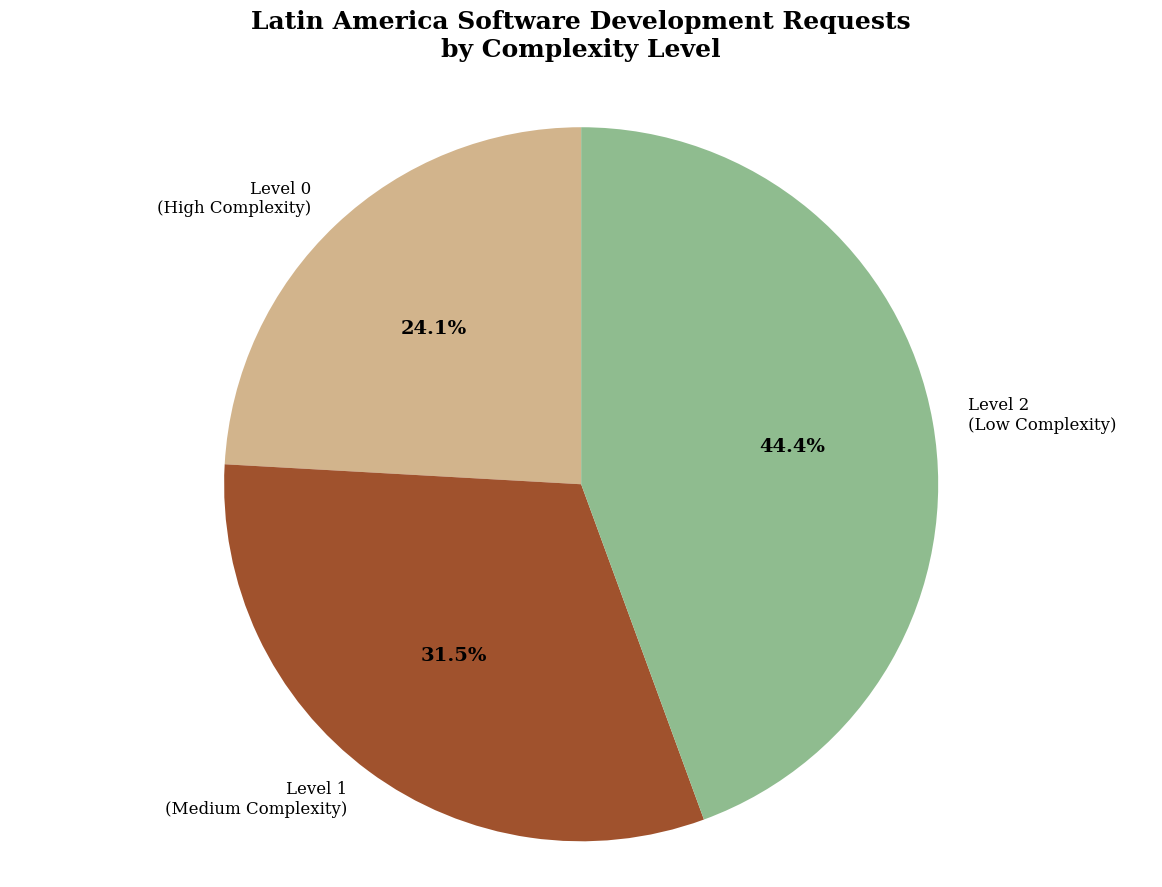


📊 LATIN AMERICA SOFTWARE DEVELOPMENT SUMMARY
Total Requests: 58,420

🔴 Level 0 High Complexity: 14,084 requests (24.1%)
🟡 Level 1 Medium Complexity: 18,390 requests (31.5%)
🟢 Level 2 Low Complexity: 25,946 requests (44.4%)



In [10]:
# Latin America Visual Pie Chart - Level Distribution
# Set custom font and style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

# Calculate level distribution for Latin America
latam_level_counts = {}
for level in sorted(latam_df['level'].unique()):
    level_data = latam_df[(latam_df['level'] == level) & (latam_df['variable'] == 'request_count')]
    total = level_data['value'].astype(float).sum()
    latam_level_counts[f'Level {level}'] = total

# Prepare data for pie chart
labels = []
sizes = []
earth_colors = ['#D2B48C', '#A0522D', '#8FBC8F']  # Tan, Sienna, Dark Sea Green

for i, (level, count) in enumerate(latam_level_counts.items()):
    complexity = "High" if "0" in level else "Medium" if "1" in level else "Low"
    labels.append(f'{level}\n({complexity} Complexity)')
    sizes.append(count)

# Create the pie chart
plt.figure(figsize=(12, 9))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=earth_colors, autopct='%1.1f%%', 
                                  startangle=90, textprops={'fontsize': 13, 'fontweight': 'normal'})

# Customize the chart
plt.title('Latin America Software Development Requests\nby Complexity Level', 
          fontsize=18, fontweight='bold', pad=25, family='serif')

# Style the percentage text
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(14)
    autotext.set_family('serif')

# Style the labels
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('normal')
    text.set_family('serif')

plt.axis('equal')
plt.tight_layout()
plt.show()

# Print summary statistics
total_requests = sum(sizes)
print(f"\n{'='*50}")
print(f"📊 LATIN AMERICA SOFTWARE DEVELOPMENT SUMMARY")
print(f"{'='*50}")
print(f"Total Requests: {total_requests:,.0f}\n")

for i, (label, size) in enumerate(zip(labels, sizes)):
    percentage = (size / total_requests) * 100
    level_name = label.split('\n')[0]
    complexity = label.split('\n')[1].replace('(', '').replace(')', '')
    
    if "High" in complexity:
        icon = "🔴"
    elif "Medium" in complexity:
        icon = "🟡"
    else:
        icon = "🟢"
    
    print(f"{icon} {level_name} {complexity}: {size:,.0f} requests ({percentage:.1f}%)")

print(f"\n{'='*50}")

In [11]:
# Latin America Software Development Requests by Complexity Level
latam_level_counts = {}

for level in sorted(latam_df['level'].unique()):
    level_data = latam_df[(latam_df['level'] == level) & (latam_df['variable'] == 'request_count')]
    total = level_data['value'].astype(float).sum()
    latam_level_counts[f'Level {level}'] = total

# Calculate percentages
total_requests = sum(latam_level_counts.values())
latam_level_percentages = {level: (count/total_requests)*100 for level, count in latam_level_counts.items()}

# Create simple text-based visualization
print("Latin America Software Development Requests by Complexity Level")
print("=" * 60)
print(f"Total Requests: {total_requests:,.0f}\n")

for level, percentage in latam_level_percentages.items():
    count = latam_level_counts[level]
    bar_length = int(percentage / 2)
    bar = "█" * bar_length
    
    complexity = "High" if "0" in level else "Medium" if "1" in level else "Low"
    print(f"{level} ({complexity} Complexity):")
    print(f"  {count:,.0f} requests ({percentage:.1f}%)")
    print(f"  {bar} {percentage:.1f}%\n")

# Show the distribution
print("Summary:")
for level, percentage in latam_level_percentages.items():
    print(f"  • {level}: {percentage:.1f}% of all Latin America software requests")

Latin America Software Development Requests by Complexity Level
Total Requests: 58,420

Level 0 (High Complexity):
  14,084 requests (24.1%)
  ████████████ 24.1%

Level 1 (Medium Complexity):
  18,390 requests (31.5%)
  ███████████████ 31.5%

Level 2 (Low Complexity):
  25,946 requests (44.4%)
  ██████████████████████ 44.4%

Summary:
  • Level 0: 24.1% of all Latin America software requests
  • Level 1: 31.5% of all Latin America software requests
  • Level 2: 44.4% of all Latin America software requests


In [12]:
# Top 5 Software Request Types in Latin America by Complexity Level
print("Top 5 Software Request Types in Latin America by Complexity Level")
print("=" * 80)

# Get top 5 for each level
top_requests = {}
for level in [0, 1, 2]:
    level_data = latam_df[(latam_df['level'] == level) & (latam_df['variable'] == 'request_count')]
    if len(level_data) > 0:
        top_5 = level_data.nlargest(5, 'value')['cluster_name'].tolist()
        top_requests[str(level)] = top_5
    else:
        top_requests[str(level)] = []

# Create table header
print(f"{'Rank':<4} {'Level 0 (High Complexity)':<45} {'Level 1 (Medium Complexity)':<45} {'Level 2 (Low Complexity)':<45}")
print("-" * 145)

# Print rows
for i in range(5):
    rank = i + 1
    
    # Level 0
    if i < len(top_requests['0']):
        l0_name = top_requests['0'][i][:42] + "..." if len(top_requests['0'][i]) > 45 else top_requests['0'][i]
    else:
        l0_name = "-"
    
    # Level 1
    if i < len(top_requests['1']):
        l1_name = top_requests['1'][i][:42] + "..." if len(top_requests['1'][i]) > 45 else top_requests['1'][i]
    else:
        l1_name = "-"
    
    # Level 2
    if i < len(top_requests['2']):
        l2_name = top_requests['2'][i][:42] + "..." if len(top_requests['2'][i]) > 45 else top_requests['2'][i]
    else:
        l2_name = "-"
    
    print(f"{rank:<4} {l0_name:<45} {l1_name:<45} {l2_name:<45}")

print("\nKey Insights:")
print("• Level 0 (High): Most complex software development tasks")
print("• Level 1 (Medium): Moderate complexity programming requests") 
print("• Level 2 (Low): Simpler coding tasks and basic development needs")

Top 5 Software Request Types in Latin America by Complexity Level
Rank Level 0 (High Complexity)                     Level 1 (Medium Complexity)                   Level 2 (Low Complexity)                     
-------------------------------------------------------------------------------------------------------------------------------------------------
1    Translate video scripts to English while p... Debug and fix software code errors across ... Provide comprehensive software development...
2    Translate and format video scripts with di... Provide comprehensive multi-technology pro... Help develop and debug complete web applic...
3    Write complete video scripts for YouTube a... Provide comprehensive database development... Help create visual content, graphics, and ...
4    Troubleshoot and fix database errors and S... Fix and improve web and mobile application... Help with automation scripts, robotics pro...
5    Help with PDF file processing, coding, and... Provide technical trou

In [13]:
# Latin America Software Development Request Analysis
print("Latin America Software Development Request Analysis")
print("=" * 50)

for level in sorted(latam_df['level'].unique()):
    level_data = latam_df[(latam_df['level'] == level) & (latam_df['variable'] == 'request_count')]
    
    num_clusters = len(level_data)
    total_volume = level_data['value'].astype(float).sum()
    avg_volume = total_volume / num_clusters if num_clusters > 0 else 0
    
    print(f"\nLevel {level} (Complexity: {'High' if level == 0 else 'Medium' if level == 1 else 'Low'}):")
    print(f"  • Distinct request types: {num_clusters}")
    print(f"  • Total volume: {total_volume:,.0f} requests")
    print(f"  • Average per request type: {avg_volume:,.0f} requests")
    
    top_requests = level_data.nlargest(5, 'value')[['cluster_name', 'value']]
    print(f"  • Top 5 request types:")
    for idx, row in top_requests.iterrows():
        print(f"    - {row['cluster_name'][:60]}{'...' if len(row['cluster_name']) > 60 else ''}: {row['value']:,.0f}")

# Calculate overall distribution percentages for insights
level_totals = []
for level in sorted(latam_df['level'].unique()):
    level_data = latam_df[(latam_df['level'] == level) & (latam_df['variable'] == 'request_count')]
    total_volume = level_data['value'].astype(float).sum()
    level_totals.append(total_volume)

grand_total = sum(level_totals)
level_percentages = [(total/grand_total)*100 for total in level_totals]

print(f"\nKey Insights:")
if len(level_percentages) >= 3:
    print(f"• Level 2 (Low complexity) accounts for {level_percentages[2]:.1f}% of total volume")
    print(f"• This indicates strong usage patterns for simpler software development requests")
    print(f"• Enterprise opportunity may be in advancing users toward more complex tasks")

Latin America Software Development Request Analysis

Level 0 (Complexity: High):
  • Distinct request types: 152
  • Total volume: 14,084 requests
  • Average per request type: 93 requests
  • Top 5 request types:
    - Translate video scripts to English while preserving original...: 1,260
    - Translate and format video scripts with dialogue preservatio...: 762
    - Write complete video scripts for YouTube and online video co...: 354
    - Troubleshoot and fix database errors and SQL query failures: 301
    - Help with PDF file processing, coding, and document operatio...: 280

Level 1 (Complexity: Medium):
  • Distinct request types: 27
  • Total volume: 18,390 requests
  • Average per request type: 681 requests
  • Top 5 request types:
    - Debug and fix software code errors across multiple programmi...: 2,963
    - Provide comprehensive multi-technology programming developme...: 2,439
    - Provide comprehensive database development and management as...: 1,834
    - Fix and impr

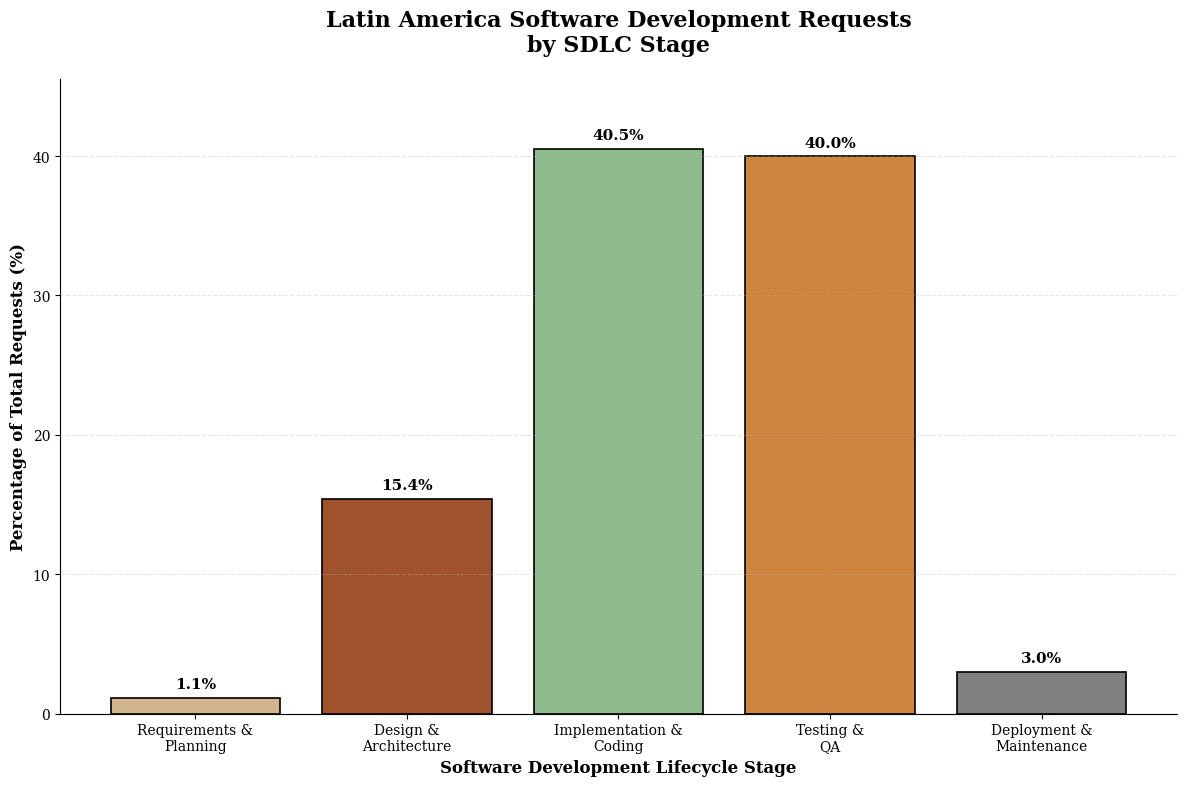


📊 LATIN AMERICA SDLC STAGE DISTRIBUTION
Total Software Requests: 58,420

Requirements & Planning: 658 requests (1.1%)
Design & Architecture: 8,994 requests (15.4%)
Implementation & Coding: 23,667 requests (40.5%)
Testing & QA: 23,348 requests (40.0%)
Deployment & Maintenance: 1,753 requests (3.0%)

🔍 Key Insights:
• Implementation & Testing dominate Claude usage (80.5%)
• Limited usage in early planning phases (1.1%)
• Deployment/DevOps represents growth opportunity (3.0%)


In [14]:
# Latin America Software Development Requests by SDLC Stage
# Filter for Latin America and request counts only
latam_sdlc = df_sdlc[(df_sdlc['region'] == 'Latin America') & (df_sdlc['variable'] == 'request_count')]

# Calculate SDLC stage distribution by volume
sdlc_distribution = {}
total_latam_requests = latam_sdlc['value'].sum()

for stage in sorted(latam_sdlc['sdlc_stage'].unique()):
    stage_volume = latam_sdlc[latam_sdlc['sdlc_stage'] == stage]['value'].sum()
    percentage = (stage_volume / total_latam_requests) * 100
    sdlc_distribution[stage] = percentage

# Prepare data for bar chart (in SDLC progression order)
sdlc_order = [
    '1_Requirements_Planning',
    '2_Design_Architecture', 
    '3_Implementation_Coding',
    '4_Testing_QA',
    '5_Deployment_Maintenance'
]

# Clean stage names for display
stage_labels = [
    'Requirements &\nPlanning',
    'Design &\nArchitecture',
    'Implementation &\nCoding', 
    'Testing &\nQA',
    'Deployment &\nMaintenance'
]

percentages = [sdlc_distribution[stage] for stage in sdlc_order]

# Create bar chart with earth tone colors
plt.figure(figsize=(12, 8))
bars = plt.bar(stage_labels, percentages, 
               color=['#D2B48C', '#A0522D', '#8FBC8F', '#CD853F', '#808080'],
               edgecolor='black', linewidth=1.2)

# Customize the chart
plt.title('Latin America Software Development Requests\nby SDLC Stage', 
          fontsize=16, fontweight='bold', pad=20, family='serif')
plt.xlabel('Software Development Lifecycle Stage', fontsize=12, fontweight='bold', family='serif')
plt.ylabel('Percentage of Total Requests (%)', fontsize=12, fontweight='bold', family='serif')

# Add percentage labels on top of bars
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{percentage:.1f}%', ha='center', va='bottom', 
             fontsize=11, fontweight='bold', family='serif')

# Style the chart
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max(percentages) + 5)
plt.xticks(rotation=0, fontsize=10, family='serif')
plt.yticks(fontsize=10, family='serif')

# Add subtle styling
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_linewidth(0.8)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n{'='*60}")
print(f"📊 LATIN AMERICA SDLC STAGE DISTRIBUTION")
print(f"{'='*60}")
print(f"Total Software Requests: {total_latam_requests:,.0f}\n")

for stage, label, percentage in zip(sdlc_order, stage_labels, percentages):
    volume = latam_sdlc[latam_sdlc['sdlc_stage'] == stage]['value'].sum()
    print(f"{label.replace(chr(10), ' ')}: {volume:,.0f} requests ({percentage:.1f}%)")

print(f"\n🔍 Key Insights:")
print(f"• Implementation & Testing dominate Claude usage ({percentages[2] + percentages[3]:.1f}%)")
print(f"• Limited usage in early planning phases ({percentages[0]:.1f}%)")
print(f"• Deployment/DevOps represents growth opportunity ({percentages[4]:.1f}%)")
print(f"{'='*60}")

# Europe Analysis

In [15]:
# Filter data for Europe
europe_df = df[df['region'] == 'Europe'].copy()

print(f"Europe records: {len(europe_df)}")
print(f"Complexity levels: {sorted(europe_df['level'].unique())}")
print(f"Variables: {europe_df['variable'].unique()}")

# Show distribution by level and variable
print("\nRecords by level and variable:")
for level in sorted(europe_df['level'].unique()):
    level_data = europe_df[europe_df['level'] == level]
    print(f"\nLevel {level}:")
    for var in level_data['variable'].unique():
        count = len(level_data[level_data['variable'] == var])
        print(f"  {var}: {count} records")

Europe records: 402
Complexity levels: [np.int64(0), np.int64(1), np.int64(2)]
Variables: ['request_count' 'request_pct']

Records by level and variable:

Level 0:
  request_count: 165 records
  request_pct: 165 records

Level 1:
  request_count: 28 records
  request_pct: 28 records

Level 2:
  request_count: 8 records
  request_pct: 8 records


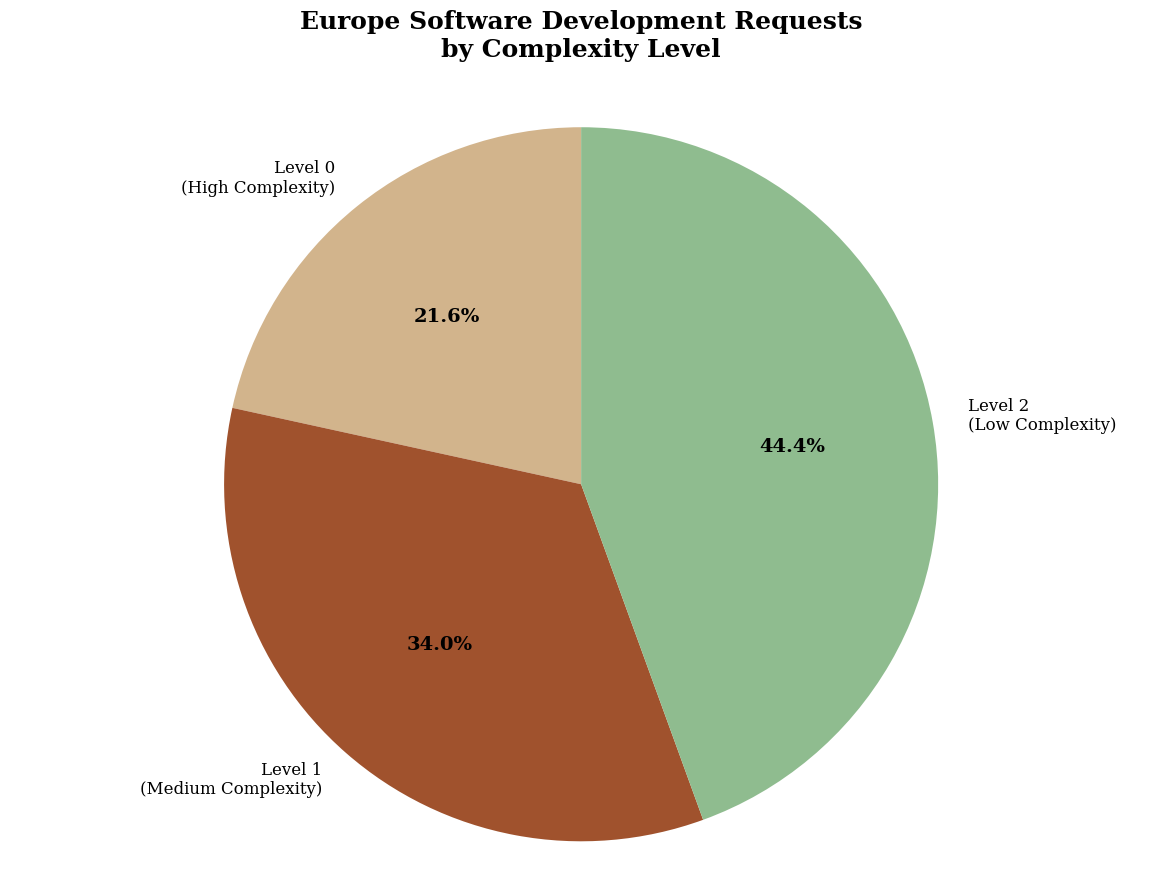


📊 EUROPE SOFTWARE DEVELOPMENT SUMMARY
Total Requests: 144,250

🔴 Level 0 High Complexity: 31,111 requests (21.6%)
🟡 Level 1 Medium Complexity: 49,021 requests (34.0%)
🟢 Level 2 Low Complexity: 64,118 requests (44.4%)



In [16]:
# Europe Visual Pie Chart - Level Distribution
# Set custom font and style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

# Calculate level distribution for Europe
europe_level_counts = {}
for level in sorted(europe_df['level'].unique()):
    level_data = europe_df[(europe_df['level'] == level) & (europe_df['variable'] == 'request_count')]
    total = level_data['value'].astype(float).sum()
    europe_level_counts[f'Level {level}'] = total

# Prepare data for pie chart
labels = []
sizes = []
earth_colors = ['#D2B48C', '#A0522D', '#8FBC8F']  # Tan, Sienna, Dark Sea Green

for i, (level, count) in enumerate(europe_level_counts.items()):
    complexity = "High" if "0" in level else "Medium" if "1" in level else "Low"
    labels.append(f'{level}\n({complexity} Complexity)')
    sizes.append(count)

# Create the pie chart
plt.figure(figsize=(12, 9))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=earth_colors, autopct='%1.1f%%', 
                                  startangle=90, textprops={'fontsize': 13, 'fontweight': 'normal'})

# Customize the chart
plt.title('Europe Software Development Requests\nby Complexity Level', 
          fontsize=18, fontweight='bold', pad=25, family='serif')

# Style the percentage text
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(14)
    autotext.set_family('serif')

# Style the labels
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('normal')
    text.set_family('serif')

plt.axis('equal')
plt.tight_layout()
plt.show()

# Print summary statistics
total_requests = sum(sizes)
print(f"\n{'='*50}")
print(f"📊 EUROPE SOFTWARE DEVELOPMENT SUMMARY")
print(f"{'='*50}")
print(f"Total Requests: {total_requests:,.0f}\n")

for i, (label, size) in enumerate(zip(labels, sizes)):
    percentage = (size / total_requests) * 100
    level_name = label.split('\n')[0]
    complexity = label.split('\n')[1].replace('(', '').replace(')', '')
    
    if "High" in complexity:
        icon = "🔴"
    elif "Medium" in complexity:
        icon = "🟡"
    else:
        icon = "🟢"
    
    print(f"{icon} {level_name} {complexity}: {size:,.0f} requests ({percentage:.1f}%)")

print(f"\n{'='*50}")

In [17]:
# Europe Software Development Requests by Complexity Level
europe_level_counts = {}

for level in sorted(europe_df['level'].unique()):
    level_data = europe_df[(europe_df['level'] == level) & (europe_df['variable'] == 'request_count')]
    total = level_data['value'].astype(float).sum()
    europe_level_counts[f'Level {level}'] = total

# Calculate percentages
total_requests = sum(europe_level_counts.values())
europe_level_percentages = {level: (count/total_requests)*100 for level, count in europe_level_counts.items()}

# Create simple text-based visualization
print("Europe Software Development Requests by Complexity Level")
print("=" * 60)
print(f"Total Requests: {total_requests:,.0f}\n")

for level, percentage in europe_level_percentages.items():
    count = europe_level_counts[level]
    bar_length = int(percentage / 2)
    bar = "█" * bar_length
    
    complexity = "High" if "0" in level else "Medium" if "1" in level else "Low"
    print(f"{level} ({complexity} Complexity):")
    print(f"  {count:,.0f} requests ({percentage:.1f}%)")
    print(f"  {bar} {percentage:.1f}%\n")

# Show the distribution
print("Summary:")
for level, percentage in europe_level_percentages.items():
    print(f"  • {level}: {percentage:.1f}% of all Europe software requests")

Europe Software Development Requests by Complexity Level
Total Requests: 144,250

Level 0 (High Complexity):
  31,111 requests (21.6%)
  ██████████ 21.6%

Level 1 (Medium Complexity):
  49,021 requests (34.0%)
  ████████████████ 34.0%

Level 2 (Low Complexity):
  64,118 requests (44.4%)
  ██████████████████████ 44.4%

Summary:
  • Level 0: 21.6% of all Europe software requests
  • Level 1: 34.0% of all Europe software requests
  • Level 2: 44.4% of all Europe software requests


In [18]:
# Top 5 Software Request Types in Europe by Complexity Level
print("Top 5 Software Request Types in Europe by Complexity Level")
print("=" * 80)

# Get top 5 for each level
top_requests = {}
for level in [0, 1, 2]:
    level_data = europe_df[(europe_df['level'] == level) & (europe_df['variable'] == 'request_count')]
    if len(level_data) > 0:
        top_5 = level_data.nlargest(5, 'value')['cluster_name'].tolist()
        top_requests[str(level)] = top_5
    else:
        top_requests[str(level)] = []

# Create table header
print(f"{'Rank':<4} {'Level 0 (High Complexity)':<45} {'Level 1 (Medium Complexity)':<45} {'Level 2 (Low Complexity)':<45}")
print("-" * 145)

# Print rows
for i in range(5):
    rank = i + 1
    
    # Level 0
    if i < len(top_requests['0']):
        l0_name = top_requests['0'][i][:42] + "..." if len(top_requests['0'][i]) > 45 else top_requests['0'][i]
    else:
        l0_name = "-"
    
    # Level 1
    if i < len(top_requests['1']):
        l1_name = top_requests['1'][i][:42] + "..." if len(top_requests['1'][i]) > 45 else top_requests['1'][i]
    else:
        l1_name = "-"
    
    # Level 2
    if i < len(top_requests['2']):
        l2_name = top_requests['2'][i][:42] + "..." if len(top_requests['2'][i]) > 45 else top_requests['2'][i]
    else:
        l2_name = "-"
    
    print(f"{rank:<4} {l0_name:<45} {l1_name:<45} {l2_name:<45}")

print("\nKey Insights:")
print("• Level 0 (High): Most complex software development tasks")
print("• Level 1 (Medium): Moderate complexity programming requests") 
print("• Level 2 (Low): Simpler coding tasks and basic development needs")

Top 5 Software Request Types in Europe by Complexity Level
Rank Level 0 (High Complexity)                     Level 1 (Medium Complexity)                   Level 2 (Low Complexity)                     
-------------------------------------------------------------------------------------------------------------------------------------------------
1    Debug and fix errors in existing Python code  Debug and fix software code errors across ... Provide comprehensive software development...
2    Help troubleshoot git operations and GitHu... Provide comprehensive multi-technology pro... Help develop and debug complete web applic...
3    Debug and fix API integrations and third-p... Provide technical troubleshooting and supp... Help with automation scripts, robotics pro...
4    Troubleshoot and fix database errors and S... Provide comprehensive database development... Help create visual content, graphics, and ...
5    Fix and improve video game development cod... Fix and improve web and mobil

In [19]:
# Europe Software Development Request Analysis
print("Europe Software Development Request Analysis")
print("=" * 50)

for level in sorted(europe_df['level'].unique()):
    level_data = europe_df[(europe_df['level'] == level) & (europe_df['variable'] == 'request_count')]
    
    num_clusters = len(level_data)
    total_volume = level_data['value'].astype(float).sum()
    avg_volume = total_volume / num_clusters if num_clusters > 0 else 0
    
    print(f"\nLevel {level} (Complexity: {'High' if level == 0 else 'Medium' if level == 1 else 'Low'}):")
    print(f"  • Distinct request types: {num_clusters}")
    print(f"  • Total volume: {total_volume:,.0f} requests")
    print(f"  • Average per request type: {avg_volume:,.0f} requests")
    
    top_requests = level_data.nlargest(5, 'value')[['cluster_name', 'value']]
    print(f"  • Top 5 request types:")
    for idx, row in top_requests.iterrows():
        print(f"    - {row['cluster_name'][:60]}{'...' if len(row['cluster_name']) > 60 else ''}: {row['value']:,.0f}")

# Calculate overall distribution percentages for insights
level_totals = []
for level in sorted(europe_df['level'].unique()):
    level_data = europe_df[(europe_df['level'] == level) & (europe_df['variable'] == 'request_count')]
    total_volume = level_data['value'].astype(float).sum()
    level_totals.append(total_volume)

grand_total = sum(level_totals)
level_percentages = [(total/grand_total)*100 for total in level_totals]

print(f"\nKey Insights:")
if len(level_percentages) >= 3:
    print(f"• Level 2 (Low complexity) accounts for {level_percentages[2]:.1f}% of total volume")
    print(f"• This indicates strong usage patterns for simpler software development requests")
    print(f"• Enterprise opportunity may be in advancing users toward more complex tasks")

Europe Software Development Request Analysis

Level 0 (Complexity: High):
  • Distinct request types: 165
  • Total volume: 31,111 requests
  • Average per request type: 189 requests
  • Top 5 request types:
    - Debug and fix errors in existing Python code: 601
    - Help troubleshoot git operations and GitHub repository manag...: 473
    - Debug and fix API integrations and third-party service conne...: 440
    - Troubleshoot and fix database errors and SQL query failures: 438
    - Fix and improve video game development code and features: 426

Level 1 (Complexity: Medium):
  • Distinct request types: 28
  • Total volume: 49,021 requests
  • Average per request type: 1,751 requests
  • Top 5 request types:
    - Debug and fix software code errors across multiple programmi...: 8,341
    - Provide comprehensive multi-technology programming developme...: 7,047
    - Provide technical troubleshooting and support for software, ...: 3,485
    - Provide comprehensive database development a

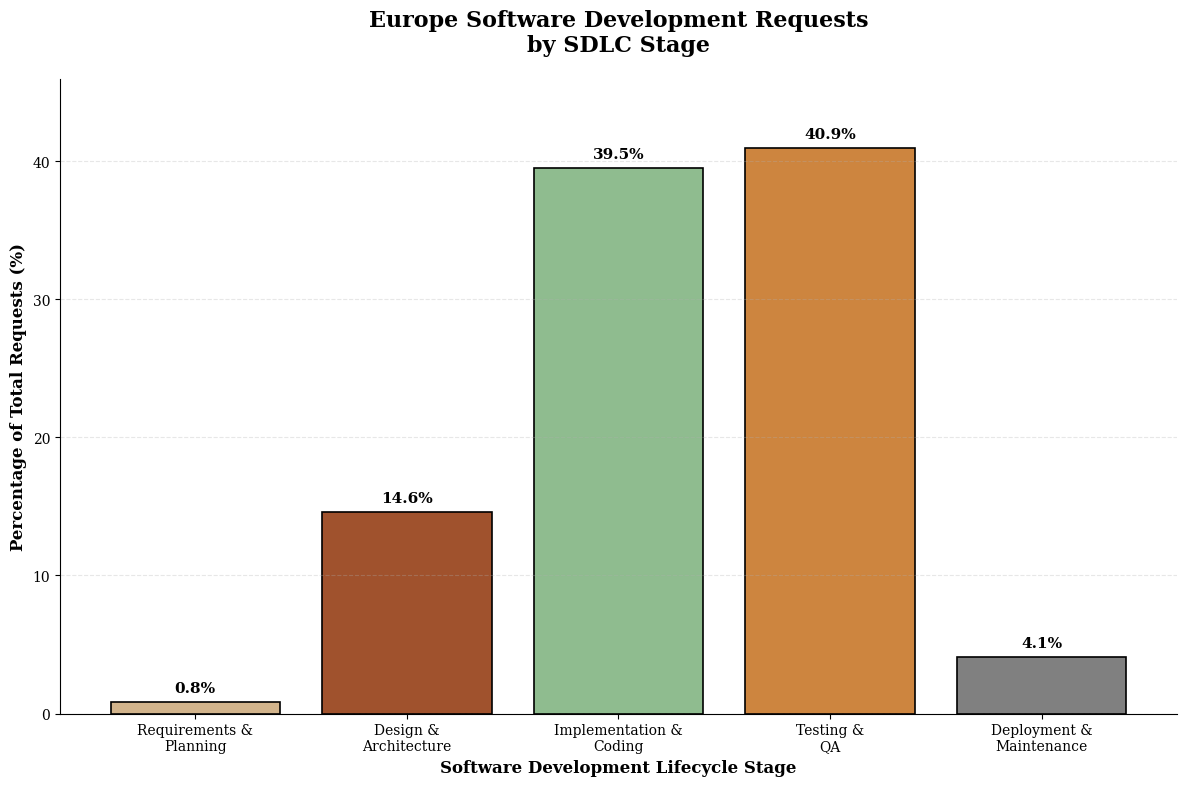


📊 EUROPE SDLC STAGE DISTRIBUTION
Total Software Requests: 144,250

Requirements & Planning: 1,213 requests (0.8%)
Design & Architecture: 21,091 requests (14.6%)
Implementation & Coding: 56,997 requests (39.5%)
Testing & QA: 59,050 requests (40.9%)
Deployment & Maintenance: 5,899 requests (4.1%)

🔍 Key Insights:
• Implementation & Testing dominate Claude usage (80.4%)
• Limited usage in early planning phases (0.8%)
• Deployment/DevOps represents growth opportunity (4.1%)


In [20]:
# Europe Software Development Requests by SDLC Stage
# Filter for Europe and request counts only
europe_sdlc = df_sdlc[(df_sdlc['region'] == 'Europe') & (df_sdlc['variable'] == 'request_count')]

# Calculate SDLC stage distribution by volume
sdlc_distribution = {}
total_europe_requests = europe_sdlc['value'].sum()

for stage in sorted(europe_sdlc['sdlc_stage'].unique()):
    stage_volume = europe_sdlc[europe_sdlc['sdlc_stage'] == stage]['value'].sum()
    percentage = (stage_volume / total_europe_requests) * 100
    sdlc_distribution[stage] = percentage

# Prepare data for bar chart (in SDLC progression order)
sdlc_order = [
    '1_Requirements_Planning',
    '2_Design_Architecture', 
    '3_Implementation_Coding',
    '4_Testing_QA',
    '5_Deployment_Maintenance'
]

# Clean stage names for display
stage_labels = [
    'Requirements &\nPlanning',
    'Design &\nArchitecture',
    'Implementation &\nCoding', 
    'Testing &\nQA',
    'Deployment &\nMaintenance'
]

percentages = [sdlc_distribution[stage] for stage in sdlc_order]

# Create bar chart with earth tone colors
plt.figure(figsize=(12, 8))
bars = plt.bar(stage_labels, percentages, 
               color=['#D2B48C', '#A0522D', '#8FBC8F', '#CD853F', '#808080'],
               edgecolor='black', linewidth=1.2)

# Customize the chart
plt.title('Europe Software Development Requests\nby SDLC Stage', 
          fontsize=16, fontweight='bold', pad=20, family='serif')
plt.xlabel('Software Development Lifecycle Stage', fontsize=12, fontweight='bold', family='serif')
plt.ylabel('Percentage of Total Requests (%)', fontsize=12, fontweight='bold', family='serif')

# Add percentage labels on top of bars
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{percentage:.1f}%', ha='center', va='bottom', 
             fontsize=11, fontweight='bold', family='serif')

# Style the chart
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max(percentages) + 5)
plt.xticks(rotation=0, fontsize=10, family='serif')
plt.yticks(fontsize=10, family='serif')

# Add subtle styling
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_linewidth(0.8)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n{'='*60}")
print(f"📊 EUROPE SDLC STAGE DISTRIBUTION")
print(f"{'='*60}")
print(f"Total Software Requests: {total_europe_requests:,.0f}\n")

for stage, label, percentage in zip(sdlc_order, stage_labels, percentages):
    volume = europe_sdlc[europe_sdlc['sdlc_stage'] == stage]['value'].sum()
    print(f"{label.replace(chr(10), ' ')}: {volume:,.0f} requests ({percentage:.1f}%)")

print(f"\n🔍 Key Insights:")
print(f"• Implementation & Testing dominate Claude usage ({percentages[2] + percentages[3]:.1f}%)")
print(f"• Limited usage in early planning phases ({percentages[0]:.1f}%)")
print(f"• Deployment/DevOps represents growth opportunity ({percentages[4]:.1f}%)")
print(f"{'='*60}")

# Middle East & Africa Analysis

In [21]:
# Filter data for Middle East & Africa
mea_df = df[df['region'] == 'Middle East & Africa'].copy()

print(f"Middle East & Africa records: {len(mea_df)}")
print(f"Complexity levels: {sorted(mea_df['level'].unique())}")
print(f"Variables: {mea_df['variable'].unique()}")

# Show distribution by level and variable
print("\nRecords by level and variable:")
for level in sorted(mea_df['level'].unique()):
    level_data = mea_df[mea_df['level'] == level]
    print(f"\nLevel {level}:")
    for var in level_data['variable'].unique():
        count = len(level_data[level_data['variable'] == var])
        print(f"  {var}: {count} records")

Middle East & Africa records: 350
Complexity levels: [np.int64(0), np.int64(1), np.int64(2)]
Variables: ['request_count' 'request_pct']

Records by level and variable:

Level 0:
  request_count: 140 records
  request_pct: 140 records

Level 1:
  request_count: 27 records
  request_pct: 27 records

Level 2:
  request_count: 8 records
  request_pct: 8 records


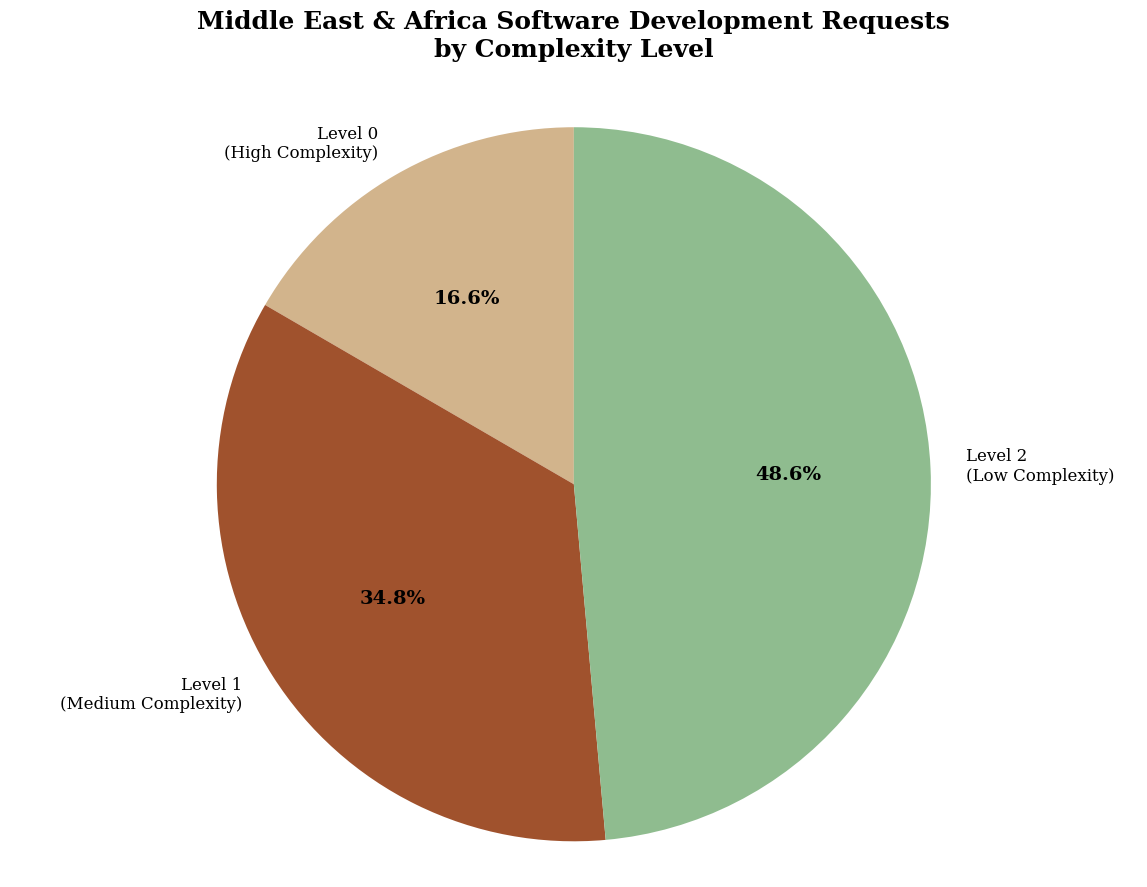


📊 MIDDLE EAST & AFRICA SOFTWARE DEVELOPMENT SUMMARY
Total Requests: 63,967

🔴 Level 0 High Complexity: 10,635 requests (16.6%)
🟡 Level 1 Medium Complexity: 22,258 requests (34.8%)
🟢 Level 2 Low Complexity: 31,074 requests (48.6%)



In [22]:
# Middle East & Africa Visual Pie Chart - Level Distribution
# Set custom font and style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

# Calculate level distribution for Middle East & Africa
mea_level_counts = {}
for level in sorted(mea_df['level'].unique()):
    level_data = mea_df[(mea_df['level'] == level) & (mea_df['variable'] == 'request_count')]
    total = level_data['value'].astype(float).sum()
    mea_level_counts[f'Level {level}'] = total

# Prepare data for pie chart
labels = []
sizes = []
earth_colors = ['#D2B48C', '#A0522D', '#8FBC8F']  # Tan, Sienna, Dark Sea Green

for i, (level, count) in enumerate(mea_level_counts.items()):
    complexity = "High" if "0" in level else "Medium" if "1" in level else "Low"
    labels.append(f'{level}\n({complexity} Complexity)')
    sizes.append(count)

# Create the pie chart
plt.figure(figsize=(12, 9))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=earth_colors, autopct='%1.1f%%', 
                                  startangle=90, textprops={'fontsize': 13, 'fontweight': 'normal'})

# Customize the chart
plt.title('Middle East & Africa Software Development Requests\nby Complexity Level', 
          fontsize=18, fontweight='bold', pad=25, family='serif')

# Style the percentage text
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(14)
    autotext.set_family('serif')

# Style the labels
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('normal')
    text.set_family('serif')

plt.axis('equal')
plt.tight_layout()
plt.show()

# Print summary statistics
total_requests = sum(sizes)
print(f"\n{'='*50}")
print(f"📊 MIDDLE EAST & AFRICA SOFTWARE DEVELOPMENT SUMMARY")
print(f"{'='*50}")
print(f"Total Requests: {total_requests:,.0f}\n")

for i, (label, size) in enumerate(zip(labels, sizes)):
    percentage = (size / total_requests) * 100
    level_name = label.split('\n')[0]
    complexity = label.split('\n')[1].replace('(', '').replace(')', '')
    
    if "High" in complexity:
        icon = "🔴"
    elif "Medium" in complexity:
        icon = "🟡"
    else:
        icon = "🟢"
    
    print(f"{icon} {level_name} {complexity}: {size:,.0f} requests ({percentage:.1f}%)")

print(f"\n{'='*50}")

In [23]:
# Middle East & Africa Software Development Requests by Complexity Level
mea_level_counts = {}

for level in sorted(mea_df['level'].unique()):
    level_data = mea_df[(mea_df['level'] == level) & (mea_df['variable'] == 'request_count')]
    total = level_data['value'].astype(float).sum()
    mea_level_counts[f'Level {level}'] = total

# Calculate percentages
total_requests = sum(mea_level_counts.values())
mea_level_percentages = {level: (count/total_requests)*100 for level, count in mea_level_counts.items()}

# Create simple text-based visualization
print("Middle East & Africa Software Development Requests by Complexity Level")
print("=" * 60)
print(f"Total Requests: {total_requests:,.0f}\n")

for level, percentage in mea_level_percentages.items():
    count = mea_level_counts[level]
    bar_length = int(percentage / 2)
    bar = "█" * bar_length
    
    complexity = "High" if "0" in level else "Medium" if "1" in level else "Low"
    print(f"{level} ({complexity} Complexity):")
    print(f"  {count:,.0f} requests ({percentage:.1f}%)")
    print(f"  {bar} {percentage:.1f}%\n")

# Show the distribution
print("Summary:")
for level, percentage in mea_level_percentages.items():
    print(f"  • {level}: {percentage:.1f}% of all Middle East & Africa software requests")

Middle East & Africa Software Development Requests by Complexity Level
Total Requests: 63,967

Level 0 (High Complexity):
  10,635 requests (16.6%)
  ████████ 16.6%

Level 1 (Medium Complexity):
  22,258 requests (34.8%)
  █████████████████ 34.8%

Level 2 (Low Complexity):
  31,074 requests (48.6%)
  ████████████████████████ 48.6%

Summary:
  • Level 0: 16.6% of all Middle East & Africa software requests
  • Level 1: 34.8% of all Middle East & Africa software requests
  • Level 2: 48.6% of all Middle East & Africa software requests


In [24]:
# Top 5 Software Request Types in Middle East & Africa by Complexity Level
print("Top 5 Software Request Types in Middle East & Africa by Complexity Level")
print("=" * 80)

# Get top 5 for each level
top_requests = {}
for level in [0, 1, 2]:
    level_data = mea_df[(mea_df['level'] == level) & (mea_df['variable'] == 'request_count')]
    if len(level_data) > 0:
        top_5 = level_data.nlargest(5, 'value')['cluster_name'].tolist()
        top_requests[str(level)] = top_5
    else:
        top_requests[str(level)] = []

# Create table header
print(f"{'Rank':<4} {'Level 0 (High Complexity)':<45} {'Level 1 (Medium Complexity)':<45} {'Level 2 (Low Complexity)':<45}")
print("-" * 145)

# Print rows
for i in range(5):
    rank = i + 1
    
    # Level 0
    if i < len(top_requests['0']):
        l0_name = top_requests['0'][i][:42] + "..." if len(top_requests['0'][i]) > 45 else top_requests['0'][i]
    else:
        l0_name = "-"
    
    # Level 1
    if i < len(top_requests['1']):
        l1_name = top_requests['1'][i][:42] + "..." if len(top_requests['1'][i]) > 45 else top_requests['1'][i]
    else:
        l1_name = "-"
    
    # Level 2
    if i < len(top_requests['2']):
        l2_name = top_requests['2'][i][:42] + "..." if len(top_requests['2'][i]) > 45 else top_requests['2'][i]
    else:
        l2_name = "-"
    
    print(f"{rank:<4} {l0_name:<45} {l1_name:<45} {l2_name:<45}")

print("\nKey Insights:")
print("• Level 0 (High): Most complex software development tasks")
print("• Level 1 (Medium): Moderate complexity programming requests") 
print("• Level 2 (Low): Simpler coding tasks and basic development needs")

Top 5 Software Request Types in Middle East & Africa by Complexity Level
Rank Level 0 (High Complexity)                     Level 1 (Medium Complexity)                   Level 2 (Low Complexity)                     
-------------------------------------------------------------------------------------------------------------------------------------------------
1    Debug and fix errors in existing React app... Debug and fix software code errors across ... Provide comprehensive software development...
2    Debug and fix errors in existing Python code  Provide comprehensive multi-technology pro... Help develop and debug complete web applic...
3    Debug and fix API integrations and third-p... Fix and improve web and mobile application... Help develop and debug cross-platform mobi...
4    Troubleshoot and fix database errors and S... Help develop, debug, and modify web applic... Help create visual content, graphics, and ...
5    Help troubleshoot and fix mobile app bugs ... Provide compreh

In [25]:
# Middle East & Africa Software Development Request Analysis
print("Middle East & Africa Software Development Request Analysis")
print("=" * 50)

for level in sorted(mea_df['level'].unique()):
    level_data = mea_df[(mea_df['level'] == level) & (mea_df['variable'] == 'request_count')]
    
    num_clusters = len(level_data)
    total_volume = level_data['value'].astype(float).sum()
    avg_volume = total_volume / num_clusters if num_clusters > 0 else 0
    
    print(f"\nLevel {level} (Complexity: {'High' if level == 0 else 'Medium' if level == 1 else 'Low'}):")
    print(f"  • Distinct request types: {num_clusters}")
    print(f"  • Total volume: {total_volume:,.0f} requests")
    print(f"  • Average per request type: {avg_volume:,.0f} requests")
    
    top_requests = level_data.nlargest(5, 'value')[['cluster_name', 'value']]
    print(f"  • Top 5 request types:")
    for idx, row in top_requests.iterrows():
        print(f"    - {row['cluster_name'][:60]}{'...' if len(row['cluster_name']) > 60 else ''}: {row['value']:,.0f}")

# Calculate overall distribution percentages for insights
level_totals = []
for level in sorted(mea_df['level'].unique()):
    level_data = mea_df[(mea_df['level'] == level) & (mea_df['variable'] == 'request_count')]
    total_volume = level_data['value'].astype(float).sum()
    level_totals.append(total_volume)

grand_total = sum(level_totals)
level_percentages = [(total/grand_total)*100 for total in level_totals]

print(f"\nKey Insights:")
if len(level_percentages) >= 3:
    print(f"• Level 2 (Low complexity) accounts for {level_percentages[2]:.1f}% of total volume")
    print(f"• This indicates strong usage patterns for simpler software development requests")
    print(f"• Enterprise opportunity may be in advancing users toward more complex tasks")

Middle East & Africa Software Development Request Analysis

Level 0 (Complexity: High):
  • Distinct request types: 140
  • Total volume: 10,635 requests
  • Average per request type: 76 requests
  • Top 5 request types:
    - Debug and fix errors in existing React applications: 354
    - Debug and fix errors in existing Python code: 288
    - Debug and fix API integrations and third-party service conne...: 244
    - Troubleshoot and fix database errors and SQL query failures: 226
    - Help troubleshoot and fix mobile app bugs and device issues: 223

Level 1 (Complexity: Medium):
  • Distinct request types: 27
  • Total volume: 22,258 requests
  • Average per request type: 824 requests
  • Top 5 request types:
    - Debug and fix software code errors across multiple programmi...: 3,695
    - Provide comprehensive multi-technology programming developme...: 2,791
    - Fix and improve web and mobile application UI layouts, styli...: 2,065
    - Help develop, debug, and modify web applic

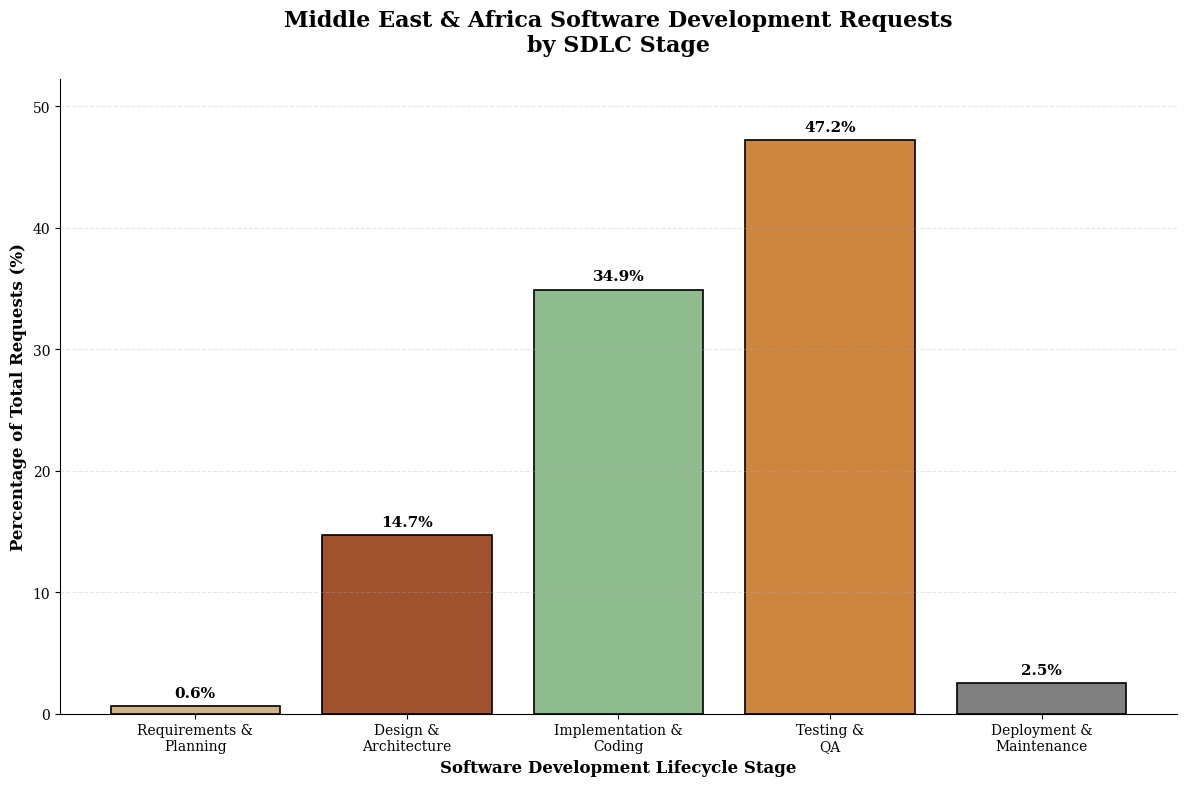


📊 MIDDLE EAST & AFRICA SDLC STAGE DISTRIBUTION
Total Software Requests: 63,967

Requirements & Planning: 400 requests (0.6%)
Design & Architecture: 9,398 requests (14.7%)
Implementation & Coding: 22,331 requests (34.9%)
Testing & QA: 30,213 requests (47.2%)
Deployment & Maintenance: 1,625 requests (2.5%)

🔍 Key Insights:
• Implementation & Testing dominate Claude usage (82.1%)
• Limited usage in early planning phases (0.6%)
• Deployment/DevOps represents growth opportunity (2.5%)


In [26]:
# Middle East & Africa Software Development Requests by SDLC Stage
# Filter for Middle East & Africa and request counts only
mea_sdlc = df_sdlc[(df_sdlc['region'] == 'Middle East & Africa') & (df_sdlc['variable'] == 'request_count')]

# Calculate SDLC stage distribution by volume
sdlc_distribution = {}
total_mea_requests = mea_sdlc['value'].sum()

for stage in sorted(mea_sdlc['sdlc_stage'].unique()):
    stage_volume = mea_sdlc[mea_sdlc['sdlc_stage'] == stage]['value'].sum()
    percentage = (stage_volume / total_mea_requests) * 100
    sdlc_distribution[stage] = percentage

# Prepare data for bar chart (in SDLC progression order)
sdlc_order = [
    '1_Requirements_Planning',
    '2_Design_Architecture', 
    '3_Implementation_Coding',
    '4_Testing_QA',
    '5_Deployment_Maintenance'
]

# Clean stage names for display
stage_labels = [
    'Requirements &\nPlanning',
    'Design &\nArchitecture',
    'Implementation &\nCoding', 
    'Testing &\nQA',
    'Deployment &\nMaintenance'
]

percentages = [sdlc_distribution[stage] for stage in sdlc_order]

# Create bar chart with earth tone colors
plt.figure(figsize=(12, 8))
bars = plt.bar(stage_labels, percentages, 
               color=['#D2B48C', '#A0522D', '#8FBC8F', '#CD853F', '#808080'],
               edgecolor='black', linewidth=1.2)

# Customize the chart
plt.title('Middle East & Africa Software Development Requests\nby SDLC Stage', 
          fontsize=16, fontweight='bold', pad=20, family='serif')
plt.xlabel('Software Development Lifecycle Stage', fontsize=12, fontweight='bold', family='serif')
plt.ylabel('Percentage of Total Requests (%)', fontsize=12, fontweight='bold', family='serif')

# Add percentage labels on top of bars
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{percentage:.1f}%', ha='center', va='bottom', 
             fontsize=11, fontweight='bold', family='serif')

# Style the chart
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max(percentages) + 5)
plt.xticks(rotation=0, fontsize=10, family='serif')
plt.yticks(fontsize=10, family='serif')

# Add subtle styling
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_linewidth(0.8)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n{'='*60}")
print(f"📊 MIDDLE EAST & AFRICA SDLC STAGE DISTRIBUTION")
print(f"{'='*60}")
print(f"Total Software Requests: {total_mea_requests:,.0f}\n")

for stage, label, percentage in zip(sdlc_order, stage_labels, percentages):
    volume = mea_sdlc[mea_sdlc['sdlc_stage'] == stage]['value'].sum()
    print(f"{label.replace(chr(10), ' ')}: {volume:,.0f} requests ({percentage:.1f}%)")

print(f"\n🔍 Key Insights:")
print(f"• Implementation & Testing dominate Claude usage ({percentages[2] + percentages[3]:.1f}%)")
print(f"• Limited usage in early planning phases ({percentages[0]:.1f}%)")
print(f"• Deployment/DevOps represents growth opportunity ({percentages[4]:.1f}%)")
print(f"{'='*60}")

# APAC Analysis

In [27]:
# Filter data for APAC
apac_df = df[df['region'] == 'APAC'].copy()

print(f"APAC records: {len(apac_df)}")
print(f"Complexity levels: {sorted(apac_df['level'].unique())}")
print(f"Variables: {apac_df['variable'].unique()}")

# Show distribution by level and variable
print("\nRecords by level and variable:")
for level in sorted(apac_df['level'].unique()):
    level_data = apac_df[apac_df['level'] == level]
    print(f"\nLevel {level}:")
    for var in level_data['variable'].unique():
        count = len(level_data[level_data['variable'] == var])
        print(f"  {var}: {count} records")

APAC records: 406
Complexity levels: [np.int64(0), np.int64(1), np.int64(2)]
Variables: ['request_count' 'request_pct']

Records by level and variable:

Level 0:
  request_count: 167 records
  request_pct: 167 records

Level 1:
  request_count: 28 records
  request_pct: 28 records

Level 2:
  request_count: 8 records
  request_pct: 8 records


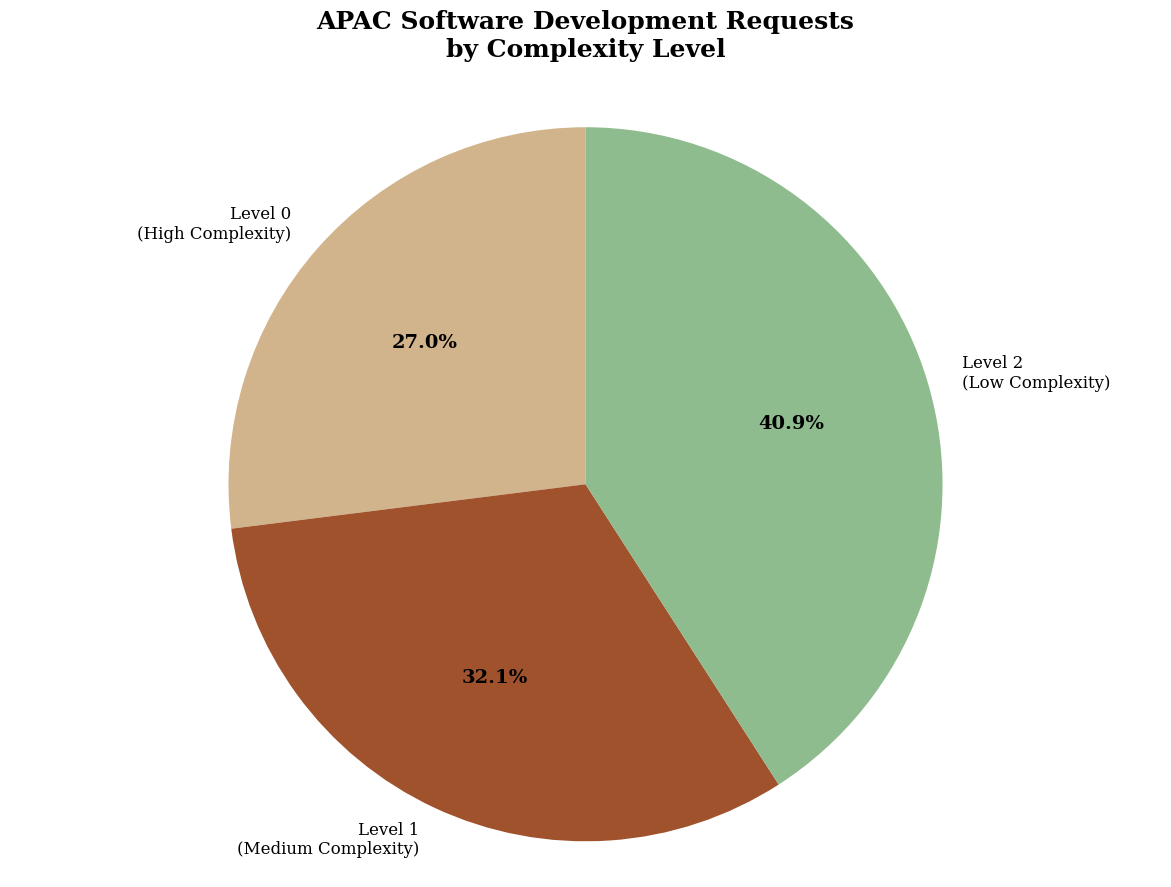


📊 APAC SOFTWARE DEVELOPMENT SUMMARY
Total Requests: 256,344

🔴 Level 0 High Complexity: 69,181 requests (27.0%)
🟡 Level 1 Medium Complexity: 82,310 requests (32.1%)
🟢 Level 2 Low Complexity: 104,853 requests (40.9%)



In [28]:
# APAC Visual Pie Chart - Level Distribution
# Set custom font and style
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

# Calculate level distribution for APAC
apac_level_counts = {}
for level in sorted(apac_df['level'].unique()):
    level_data = apac_df[(apac_df['level'] == level) & (apac_df['variable'] == 'request_count')]
    total = level_data['value'].astype(float).sum()
    apac_level_counts[f'Level {level}'] = total

# Prepare data for pie chart
labels = []
sizes = []
earth_colors = ['#D2B48C', '#A0522D', '#8FBC8F']  # Tan, Sienna, Dark Sea Green

for i, (level, count) in enumerate(apac_level_counts.items()):
    complexity = "High" if "0" in level else "Medium" if "1" in level else "Low"
    labels.append(f'{level}\n({complexity} Complexity)')
    sizes.append(count)

# Create the pie chart
plt.figure(figsize=(12, 9))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=earth_colors, autopct='%1.1f%%', 
                                  startangle=90, textprops={'fontsize': 13, 'fontweight': 'normal'})

# Customize the chart
plt.title('APAC Software Development Requests\nby Complexity Level', 
          fontsize=18, fontweight='bold', pad=25, family='serif')

# Style the percentage text
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(14)
    autotext.set_family('serif')

# Style the labels
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('normal')
    text.set_family('serif')

plt.axis('equal')
plt.tight_layout()
plt.show()

# Print summary statistics
total_requests = sum(sizes)
print(f"\n{'='*50}")
print(f"📊 APAC SOFTWARE DEVELOPMENT SUMMARY")
print(f"{'='*50}")
print(f"Total Requests: {total_requests:,.0f}\n")

for i, (label, size) in enumerate(zip(labels, sizes)):
    percentage = (size / total_requests) * 100
    level_name = label.split('\n')[0]
    complexity = label.split('\n')[1].replace('(', '').replace(')', '')
    
    if "High" in complexity:
        icon = "🔴"
    elif "Medium" in complexity:
        icon = "🟡"
    else:
        icon = "🟢"
    
    print(f"{icon} {level_name} {complexity}: {size:,.0f} requests ({percentage:.1f}%)")

print(f"\n{'='*50}")

In [29]:
# APAC Software Development Requests by Complexity Level
apac_level_counts = {}

for level in sorted(apac_df['level'].unique()):
    level_data = apac_df[(apac_df['level'] == level) & (apac_df['variable'] == 'request_count')]
    total = level_data['value'].astype(float).sum()
    apac_level_counts[f'Level {level}'] = total

# Calculate percentages
total_requests = sum(apac_level_counts.values())
apac_level_percentages = {level: (count/total_requests)*100 for level, count in apac_level_counts.items()}

# Create simple text-based visualization
print("APAC Software Development Requests by Complexity Level")
print("=" * 60)
print(f"Total Requests: {total_requests:,.0f}\n")

for level, percentage in apac_level_percentages.items():
    count = apac_level_counts[level]
    bar_length = int(percentage / 2)
    bar = "█" * bar_length
    
    complexity = "High" if "0" in level else "Medium" if "1" in level else "Low"
    print(f"{level} ({complexity} Complexity):")
    print(f"  {count:,.0f} requests ({percentage:.1f}%)")
    print(f"  {bar} {percentage:.1f}%\n")

# Show the distribution
print("Summary:")
for level, percentage in apac_level_percentages.items():
    print(f"  • {level}: {percentage:.1f}% of all APAC software requests")

APAC Software Development Requests by Complexity Level
Total Requests: 256,344

Level 0 (High Complexity):
  69,181 requests (27.0%)
  █████████████ 27.0%

Level 1 (Medium Complexity):
  82,310 requests (32.1%)
  ████████████████ 32.1%

Level 2 (Low Complexity):
  104,853 requests (40.9%)
  ████████████████████ 40.9%

Summary:
  • Level 0: 27.0% of all APAC software requests
  • Level 1: 32.1% of all APAC software requests
  • Level 2: 40.9% of all APAC software requests


In [30]:
# Top 5 Software Request Types in APAC by Complexity Level
print("Top 5 Software Request Types in APAC by Complexity Level")
print("=" * 80)

# Get top 5 for each level
top_requests = {}
for level in [0, 1, 2]:
    level_data = apac_df[(apac_df['level'] == level) & (apac_df['variable'] == 'request_count')]
    if len(level_data) > 0:
        top_5 = level_data.nlargest(5, 'value')['cluster_name'].tolist()
        top_requests[str(level)] = top_5
    else:
        top_requests[str(level)] = []

# Create table header
print(f"{'Rank':<4} {'Level 0 (High Complexity)':<45} {'Level 1 (Medium Complexity)':<45} {'Level 2 (Low Complexity)':<45}")
print("-" * 145)

# Print rows
for i in range(5):
    rank = i + 1
    
    # Level 0
    if i < len(top_requests['0']):
        l0_name = top_requests['0'][i][:42] + "..." if len(top_requests['0'][i]) > 45 else top_requests['0'][i]
    else:
        l0_name = "-"
    
    # Level 1
    if i < len(top_requests['1']):
        l1_name = top_requests['1'][i][:42] + "..." if len(top_requests['1'][i]) > 45 else top_requests['1'][i]
    else:
        l1_name = "-"
    
    # Level 2
    if i < len(top_requests['2']):
        l2_name = top_requests['2'][i][:42] + "..." if len(top_requests['2'][i]) > 45 else top_requests['2'][i]
    else:
        l2_name = "-"
    
    print(f"{rank:<4} {l0_name:<45} {l1_name:<45} {l2_name:<45}")

print("\nKey Insights:")
print("• Level 0 (High): Most complex software development tasks")
print("• Level 1 (Medium): Moderate complexity programming requests") 
print("• Level 2 (Low): Simpler coding tasks and basic development needs")

Top 5 Software Request Types in APAC by Complexity Level
Rank Level 0 (High Complexity)                     Level 1 (Medium Complexity)                   Level 2 (Low Complexity)                     
-------------------------------------------------------------------------------------------------------------------------------------------------
1    Debug and fix errors in existing React app... Debug and fix software code errors across ... Provide comprehensive software development...
2    Help with PDF file processing, coding, and... Provide comprehensive multi-technology pro... Help develop and debug complete web applic...
3    Debug and fix errors in existing Python code  Fix and improve web and mobile application... Help create visual content, graphics, and ...
4    Debug and fix software bugs in existing ap... Provide comprehensive database development... Help develop and debug cross-platform mobi...
5    Fix styling and layout issues in React com... Help develop, debug, and modify

In [31]:
# APAC Software Development Request Analysis
print("APAC Software Development Request Analysis")
print("=" * 50)

for level in sorted(apac_df['level'].unique()):
    level_data = apac_df[(apac_df['level'] == level) & (apac_df['variable'] == 'request_count')]
    
    num_clusters = len(level_data)
    total_volume = level_data['value'].astype(float).sum()
    avg_volume = total_volume / num_clusters if num_clusters > 0 else 0
    
    print(f"\nLevel {level} (Complexity: {'High' if level == 0 else 'Medium' if level == 1 else 'Low'}):")
    print(f"  • Distinct request types: {num_clusters}")
    print(f"  • Total volume: {total_volume:,.0f} requests")
    print(f"  • Average per request type: {avg_volume:,.0f} requests")
    
    top_requests = level_data.nlargest(5, 'value')[['cluster_name', 'value']]
    print(f"  • Top 5 request types:")
    for idx, row in top_requests.iterrows():
        print(f"    - {row['cluster_name'][:60]}{'...' if len(row['cluster_name']) > 60 else ''}: {row['value']:,.0f}")

# Calculate overall distribution percentages for insights
level_totals = []
for level in sorted(apac_df['level'].unique()):
    level_data = apac_df[(apac_df['level'] == level) & (apac_df['variable'] == 'request_count')]
    total_volume = level_data['value'].astype(float).sum()
    level_totals.append(total_volume)

grand_total = sum(level_totals)
level_percentages = [(total/grand_total)*100 for total in level_totals]

print(f"\nKey Insights:")
if len(level_percentages) >= 3:
    print(f"• Level 2 (Low complexity) accounts for {level_percentages[2]:.1f}% of total volume")
    print(f"• This indicates strong usage patterns for simpler software development requests")
    print(f"• Enterprise opportunity may be in advancing users toward more complex tasks")

APAC Software Development Request Analysis

Level 0 (Complexity: High):
  • Distinct request types: 167
  • Total volume: 69,181 requests
  • Average per request type: 414 requests
  • Top 5 request types:
    - Debug and fix errors in existing React applications: 1,673
    - Help with PDF file processing, coding, and document operatio...: 1,161
    - Debug and fix errors in existing Python code: 1,049
    - Debug and fix software bugs in existing applications: 993
    - Fix styling and layout issues in React components: 928

Level 1 (Complexity: Medium):
  • Distinct request types: 28
  • Total volume: 82,310 requests
  • Average per request type: 2,940 requests
  • Top 5 request types:
    - Debug and fix software code errors across multiple programmi...: 12,021
    - Provide comprehensive multi-technology programming developme...: 10,177
    - Fix and improve web and mobile application UI layouts, styli...: 7,087
    - Provide comprehensive database development and management as...:

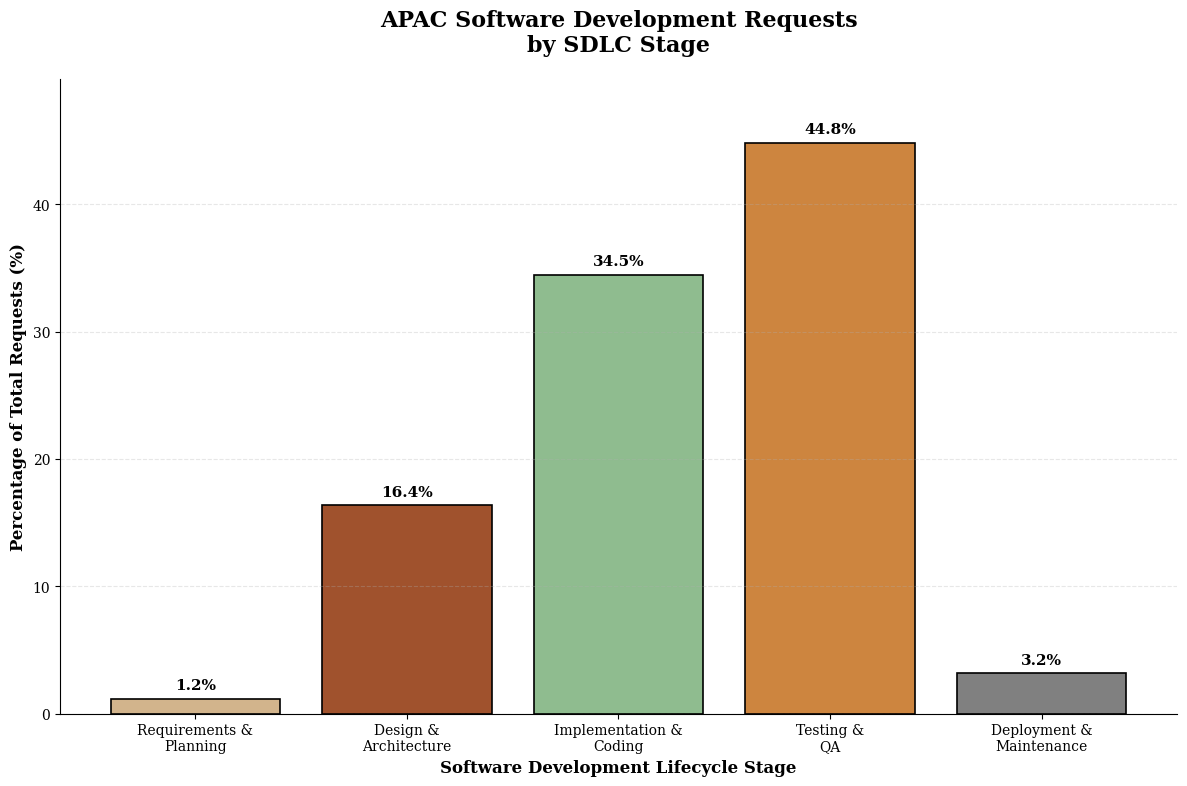


📊 APAC SDLC STAGE DISTRIBUTION
Total Software Requests: 256,344

Requirements & Planning: 2,979 requests (1.2%)
Design & Architecture: 41,961 requests (16.4%)
Implementation & Coding: 88,380 requests (34.5%)
Testing & QA: 114,922 requests (44.8%)
Deployment & Maintenance: 8,102 requests (3.2%)

🔍 Key Insights:
• Implementation & Testing dominate Claude usage (79.3%)
• Limited usage in early planning phases (1.2%)
• Deployment/DevOps represents growth opportunity (3.2%)


In [32]:
# APAC Software Development Requests by SDLC Stage
# Filter for APAC and request counts only
apac_sdlc = df_sdlc[(df_sdlc['region'] == 'APAC') & (df_sdlc['variable'] == 'request_count')]

# Calculate SDLC stage distribution by volume
sdlc_distribution = {}
total_apac_requests = apac_sdlc['value'].sum()

for stage in sorted(apac_sdlc['sdlc_stage'].unique()):
    stage_volume = apac_sdlc[apac_sdlc['sdlc_stage'] == stage]['value'].sum()
    percentage = (stage_volume / total_apac_requests) * 100
    sdlc_distribution[stage] = percentage

# Prepare data for bar chart (in SDLC progression order)
sdlc_order = [
    '1_Requirements_Planning',
    '2_Design_Architecture', 
    '3_Implementation_Coding',
    '4_Testing_QA',
    '5_Deployment_Maintenance'
]

# Clean stage names for display
stage_labels = [
    'Requirements &\nPlanning',
    'Design &\nArchitecture',
    'Implementation &\nCoding', 
    'Testing &\nQA',
    'Deployment &\nMaintenance'
]

percentages = [sdlc_distribution[stage] for stage in sdlc_order]

# Create bar chart with earth tone colors
plt.figure(figsize=(12, 8))
bars = plt.bar(stage_labels, percentages, 
               color=['#D2B48C', '#A0522D', '#8FBC8F', '#CD853F', '#808080'],
               edgecolor='black', linewidth=1.2)

# Customize the chart
plt.title('APAC Software Development Requests\nby SDLC Stage', 
          fontsize=16, fontweight='bold', pad=20, family='serif')
plt.xlabel('Software Development Lifecycle Stage', fontsize=12, fontweight='bold', family='serif')
plt.ylabel('Percentage of Total Requests (%)', fontsize=12, fontweight='bold', family='serif')

# Add percentage labels on top of bars
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{percentage:.1f}%', ha='center', va='bottom', 
             fontsize=11, fontweight='bold', family='serif')

# Style the chart
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max(percentages) + 5)
plt.xticks(rotation=0, fontsize=10, family='serif')
plt.yticks(fontsize=10, family='serif')

# Add subtle styling
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.8)
plt.gca().spines['bottom'].set_linewidth(0.8)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n{'='*60}")
print(f"📊 APAC SDLC STAGE DISTRIBUTION")
print(f"{'='*60}")
print(f"Total Software Requests: {total_apac_requests:,.0f}\n")

for stage, label, percentage in zip(sdlc_order, stage_labels, percentages):
    volume = apac_sdlc[apac_sdlc['sdlc_stage'] == stage]['value'].sum()
    print(f"{label.replace(chr(10), ' ')}: {volume:,.0f} requests ({percentage:.1f}%)")

print(f"\n🔍 Key Insights:")
print(f"• Implementation & Testing dominate Claude usage ({percentages[2] + percentages[3]:.1f}%)")
print(f"• Limited usage in early planning phases ({percentages[0]:.1f}%)")
print(f"• Deployment/DevOps represents growth opportunity ({percentages[4]:.1f}%)")
print(f"{'='*60}")